In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
store_sales = pd.read_csv('http://bit.ly/PMR-ch3')
store_sales.columns  , store_sales.shape

(Index(['store_num', 'year', 'week', 'p1_sales', 'p2_sales', 'p1_price',
        'p2_price', 'p1_promo', 'p2_promo', 'country'],
       dtype='object'), (2080, 10))

In [ ]:
store_sales.head()

,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo,country
0,101.0,1.0,1.0,122.0,110.0,2.99,2.99,0,1,USA
1,101.0,1.0,2.0,160.0,79.0,2.49,3.19,0,0,USA
2,101.0,1.0,3.0,169.0,80.0,2.19,2.99,0,0,USA
3,101.0,1.0,4.0,119.0,102.0,2.49,2.49,0,0,USA
4,101.0,1.0,5.0,114.0,143.0,2.49,2.59,0,1,USA


In [ ]:
store_sales.describe()

,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo
count,2080.000000,2080.00000,2080.00000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,110.500000,1.50000,26.50000,133.967788,99.911058,2.548654,2.716106,0.100481,0.145673
std,5.767668,0.50012,15.01194,29.355076,24.453788,0.300716,0.333559,0.300712,0.352863
min,101.000000,1.00000,1.00000,68.000000,51.000000,2.190000,2.290000,0.000000,0.000000
25%,105.750000,1.00000,13.75000,113.000000,82.000000,2.290000,2.490000,0.000000,0.000000
50%,110.500000,1.50000,26.50000,130.000000,96.000000,2.490000,2.590000,0.000000,0.000000
75%,115.250000,2.00000,39.25000,151.000000,115.000000,2.790000,2.990000,0.000000,0.000000
max,120.000000,2.00000,52.00000,265.000000,210.000000,2.990000,3.190000,1.000000,1.000000


#### Making columns with the following specs 
1- Age  ...just random normal data with mean=35 ,std=5 amd size= dataframe

2- Credict_score .... random normal data (but relate mean of the distribution to customer's age .Older customers having higher credit score on average. It can be done by mean*age + offset value

3- Email .... Categorical with numpy random.choice of 'yes' and 'no' 
              with 0.8,0.2 probabilities

4- Distance to store...take the expnonential of the of the np.random.normal distribution



In [ ]:
# simulating above data

d=np.random.randint(low=1,high=2000 ,size=(2080,10))
sales=pd.DataFrame(data=d,columns=store_sales.columns)


In [ ]:
N_STORES = 20
N_WEEKS = 104
# create a dataframe of initially missing values to hold the data
columns = ('store_num', 'year', 'week', 'p1_sales', 'p2_sales',
'p1_price', 'p2_price', 'p1_promo', 'p2_promo', 'country')
n_rows = N_STORES * N_WEEKS
store_sales = pd.DataFrame(np.empty(shape=(n_rows, 10)),
columns=columns)
store_sales.head(3)

,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo,country
0,0.000000e+00,4.451531e-321,3.735136e-321,7.020673e-321,2.964394e-321,7.272646e-321,1.032597e-321,1.650179e-321,1.156114e-321,5.973254e-321
1,3.774662e-321,9.382307e-321,4.367540e-321,8.117499e-321,5.948550e-321,5.237096e-322,8.547336e-322,1.235164e-321,8.250896e-322,8.972232e-321
2,4.268727e-321,9.733093e-321,5.291443e-321,1.240105e-321,5.874441e-321,9.411951e-321,2.376456e-321,4.995004e-321,6.818106e-322,3.270715e-321


# **1- df.loc[9, 'shield']**

In [ ]:
>>> df = pd.DataFrame([[1, 2], [4, 5], [7, 8], [17, 18]],
...      index=[7, 8, 9,10], columns=['max_speed', 'shield'])
>>> df

,max_speed,shield
7,1,2
8,4,5
9,7,8
10,17,18


In [ ]:
df.loc[9, 'shield']

8

In [ ]:
store_numbers = range(101, 101 + N_STORES)

In [ ]:
len(store_numbers)

20

# **2- Filling columns using dictionary and for loop**

filling store_num	year	week	country columns  in store_sales
### Fill 'store_num'	 column with 20 store ids. 
### Fill "country" column with 20 country names . 
### Fill 'year' columns with  1 and 2
### Also we need to fill weeks against them from 1 to 52

In [ ]:
store_numbers = range(101, 101 + N_STORES)
store_country = dict(zip(store_numbers,
['USA', 'USA', 'USA', 'DEU', 'DEU', 'DEU',
'DEU', 'DEU', 'GBR', 'GBR', 'GBR', 'BRA',
'BRA', 'JPN', 'JPN', 'JPN', 'JPN', 'AUS',
'CHN', 'CHN']))

In [ ]:
i=0
for store_num in store_numbers :
  for week in range(1,53):
    for year in [1,2]:
    
      store_sales.loc[i, 'store_num']=store_num
      store_sales.loc[i,'week']=week
      store_sales.loc[i,'year']=year
      store_sales.loc[i,'country']=store_country[store_num]
      i=i+1



In [ ]:
# 10% promoted
store_sales.p1_promo = np.random.binomial(n=1, p=0.1, size=n_rows)
# 15% promoted
store_sales.p2_promo = np.random.binomial(n=1, p=0.15, size=n_rows)

In [ ]:
# price ranges from 2.19 to 3.19 ...make it random choice of 5 options
store_sales.p1_price = np.random.choice([2.19, 2.29, 2.49, 2.79,
2.99],
size=n_rows)
store_sales.p2_price = np.random.choice([2.29, 2.49, 2.59, 2.99,
3.19],
size=n_rows)

Our last step is to simulate the sales figures for each week. We calculate sales as a function of the relative prices of the
two products along with the promotional status of each.
Item sales are in unit counts, so we use the Poisson distribution to generate count data: np.random.poisson(lam,
size), where size is the number of draws and lam represents lambda, the defining parameter of the Poisson distribution.
Lambda represents the expected, or mean, value of units per week.
We draw a random Poisson count for each row (size=n_rows), and set the mean sales (lam) of Product 1 to be higher
than that of Product 2:

In [ ]:
# sales data, using poisson (counts) distribution, np.random.poisson()
# first, the default sales in the absence of promotion
sales_p1 = np.random.poisson(lam=120, size=n_rows)
sales_p2 = np.random.poisson(lam=100, size=n_rows)

Now we scale those counts up or down according to the relative prices. Price effects often follow a logarithmic function
rather than a linear function (Rao 2009), so we use np.log(price) here:

In [ ]:
# scale sales according to the ratio of log(price)
log_p1_price = np.log(store_sales.p1_price)
log_p2_price = np.log(store_sales.p2_price)
sales_p1 = sales_p1 * log_p2_price/log_p1_price
sales_p2 = sales_p2 * log_p1_price/log_p2_price

In [ ]:
# final sales get a 30% or 40% lift when promoted
store_sales.p1_sales = np.floor(sales_p1 *(1 + store_sales.p1_promo * 0.3))
store_sales.p2_sales = np.floor(sales_p2 *
(1 + store_sales.p2_promo * 0.4))

In [ ]:
store_sales.dtypes

store_num    float64
year         float64
week         float64
p1_sales     float64
p2_sales     float64
p1_price     float64
p2_price     float64
p1_promo       int64
p2_promo       int64
country       object
dtype: object

In [ ]:
store_sales.country = store_sales.country.astype(pd.CategoricalDtype())
store_sales.store_num = store_sales.store_num.astype(pd.CategoricalDtype())

In [ ]:
store_sales.sample(4)

,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo,country
1593,116.0,2.0,17.0,141.0,91.0,2.19,2.29,0,0,JPN
548,106.0,1.0,15.0,127.0,88.0,2.19,2.29,0,0,DEU
596,106.0,1.0,39.0,164.0,101.0,2.29,2.49,1,0,DEU
1376,114.0,1.0,13.0,201.0,76.0,2.19,2.99,0,0,JPN


In [ ]:
store_sales.groupby(['store_num','year'])[['p1_sales', 'p2_sales']].mean().unstack().head()

p1_sales                p2_sales            
year              1.0         2.0         1.0         2.0
store_num                                                
101.0      127.365385  127.846154   98.211538  105.750000
102.0      133.961538  138.326923  101.846154  101.326923
103.0      126.269231  128.865385  102.384615  106.673077
104.0      136.057692  136.019231  100.788462   96.846154
105.0      124.903846  138.384615  103.173077  102.365385

In [ ]:
# use count for discrete variables and dont use mean
store_sales.groupby('p1_promo')['p1_price'].value_counts().unstack()

p1_price,2.19,2.29,2.49,2.79,2.99
p1_promo,,,,,
0,366,369,386,368,385
1,51,39,43,33,40


In [ ]:
# use count for discrete variables and dont use mean
store_sales.groupby('p1_promo').p1_price.value_counts().unstack()

p1_price,2.19,2.29,2.49,2.79,2.99
p1_promo,,,,,
0,366,369,386,368,385
1,51,39,43,33,40


In [ ]:
store_sales.p1_sales.quantile(q=[0.25, 0.5, 0.75])

0.25    112.0
0.50    129.0
0.75    149.0
Name: p1_sales, dtype: float64

In [ ]:
# above we found 25% ,50 and 75% quantils..we can find other values also
store_sales.p1_sales.quantile(q=[0.05, 0.95])


0.05     92.0
0.95    187.0
Name: p1_sales, dtype: float64

In [ ]:
store_sales.p1_sales.quantile(q=np.arange(0, 1.1, 0.1))

0.0     73.0
0.1     99.0
0.2    108.0
0.3    115.0
0.4    122.0
0.5    129.0
0.6    136.0
0.7    144.0
0.8    156.0
0.9    173.0
1.0    271.0
Name: p1_sales, dtype: float64

# **3- IQR Calculation using quantiles (75-25)**

In [ ]:
# finding inter-quantile range
def iqr(x):
  return x.quantile(0.75) - x.quantile(0.25)
iqr(store_sales.p1_sales)

37.0

In [ ]:
# combining summary statistics in a seperate column
pd.DataFrame([[store_sales.p1_sales.median(),
store_sales.p2_sales.median()],
[iqr(store_sales.p1_sales),
iqr(store_sales.p2_sales)]],
index=['Median sales', 'IQR'],
columns=['p1_sales', 'p2_sales'])

,p1_sales,p2_sales
Median sales,129.0,97.0
IQR,37.0,33.0


In [ ]:
pd.DataFrame([store_sales[['p1_sales', 'p2_sales']].median(),
store_sales[['p1_sales', 'p2_sales']].apply(iqr)],
index=['Median sales', 'IQR'])

,p1_sales,p2_sales
Median sales,129.0,97.0
IQR,37.0,33.0


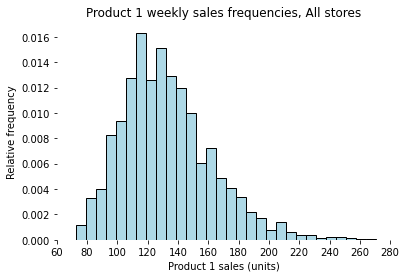

In [ ]:
store_sales.p1_sales.hist(bins=30,
edgecolor='k',
facecolor='lightblue',
density=True)
plt.title('Product 1 weekly sales frequencies, All stores')
plt.xlabel('Product 1 sales (units)')
plt.ylabel('Relative frequency')
plt.xticks(range(60, 300, 20))
plt.grid(False)
plt.box(False)

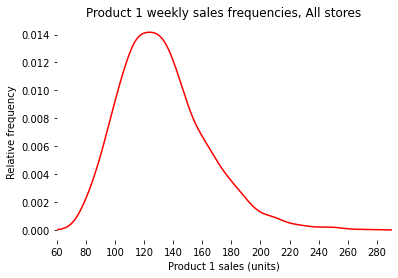

In [ ]:
store_sales.p1_sales.plot.density(color='red')

plt.title('Product 1 weekly sales frequencies, All stores')
plt.xlabel('Product 1 sales (units)')
plt.ylabel('Relative frequency')
plt.xticks(range(60, 300, 20))
plt.xlim((60, 290))
plt.box(False)

# **4- Box plot with Column and By parameters for multiple box plots for comparision**

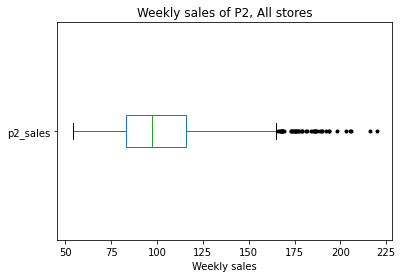

In [ ]:
p = store_sales.p2_sales.plot.box(vert=False, sym='k.')
plt.title('Weekly sales of P2, All stores')
plt.xlabel('Weekly sales')
p.set_facecolor('w')

How do different stores compare
on sales of product 2? The boxplot() method makes it easy to compare these with the by argument, which specifies the
column by which to group. The column argument indicates the column represented by the boxplot distribution, p2_sales
in this case. These correspond to the response variable p2_sales which we plot with regards to the explanatory variable
store_num:

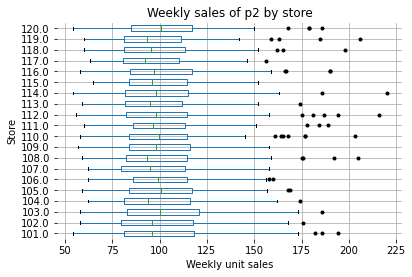

In [ ]:
store_sales.boxplot(column='p2_sales', by='store_num', vert=False,
sym='k.')
plt.suptitle('')
plt.title('Weekly sales of p2 by store')
plt.xlabel('Weekly unit sales')
plt.ylabel('Store')
plt.box(False)

# Cummulative Distribution

## Example : the 90th percentile for weekly sales of P1 or  the value for which 90% of weekly sales of P1will be lower

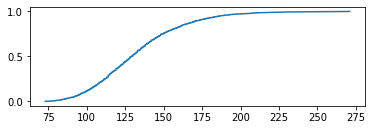

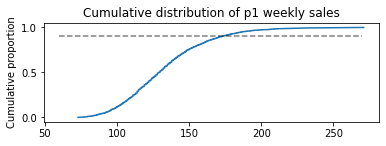

In [ ]:
plt.subplot(2,1,1)
plt.plot(e.x, e.y)
plt.title('Cumulative distribution of p1 weekly sales')
plt.ylabel('Cumulative proportion')
plt.plot([60, 270], [0.9, 0.9], 'k--', alpha=0.5)

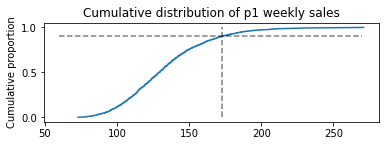

In [ ]:
plt.subplot(2,1,1)
plt.plot(e.x, e.y)
plt.title('Cumulative distribution of p1 weekly sales')
plt.ylabel('Cumulative proportion')
plt.plot([60, 270], [0.9, 0.9], 'k--', alpha=0.5)
plt.plot([store_sales.p1_sales.quantile(.9),store_sales.p1_sales.quantile(.9)],[0, 1],, 'k--', alpha=0.5)

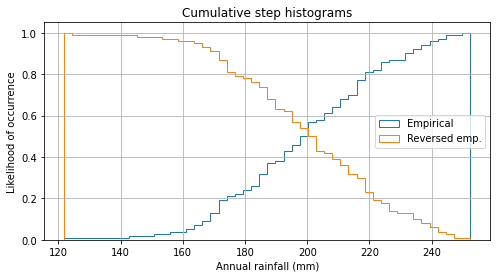

In [ ]:

np.random.seed(19680801)

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
ax.hist(x, n_bins, density=True, histtype='step', cumulative=True, label='Empirical')

# # Add a line showing the expected distribution.
# y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
#      np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
# y = y.cumsum()
# y /= y[-1]

# ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
        label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

In [ ]:
plt.plot([store_sales.p1_sales.quantile(.9),store_sales.p1_sales.quantile(.9)],[0, 1], 'k--', alpha=0.5)

# **5- Commulative Distribution Functions**

\begin{array}{l}
F_{X}(x)=P(X \leq x)\\
F_{X}(x)=\text { function of } x\\
X \quad X=\text { real value variable } \\
P \quad P=\text { probability that X will have a value less than or equal to x }
\end{array}


### Example : the 90th percentile for weekly sales of P1 or  the value for which 90% of weekly sales of P1will be lower

# **5a Method -1 : Using Histogram with cummulative=True parameter**

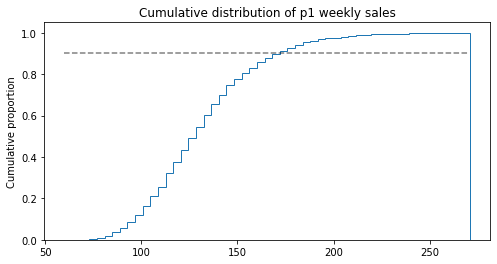

In [ ]:
x=store_sales.p1_sales
fig, ax = plt.subplots(figsize=(8, 4))
n_bins = 50
plt.title('Cumulative Steps Histogram of p1 weekly sales')
plt.ylabel('Cumulative proportion')
# plot the cumulative histogram
ax.hist(x, n_bins, density=True, histtype='step', cumulative=True, label='Empirical')

ax.plot([60, 270], [0.9, 0.9], 'k--', alpha=0.5)
plt.show()

# **5-b Method -2 Calculating actual CDF and then plotting**

In [ ]:
import pandas.util.testing as tm
from statsmodels.distributions.empirical_distribution import ECDF
e = ECDF(store_sales.p1_sales)

plt.subplot(2,1,1)
plt.plot(e.x, e.y)
plt.show()

# Take away
1- df.loc[9, 'shield']

2- Filling columns

store_numbers = range(101, 101 + N_STORES)

store_country = dict(zip(store_numbers,
['USA', 'USA', 'USA', 'DEU', 'DEU', 'DEU',
'DEU', 'DEU', 'GBR', 'GBR', 'GBR', 'BRA',
'BRA', 'JPN', 'JPN', 'JPN', 'JPN', 'AUS',
'CHN', 'CHN']))


i=0

for store_num in store_numbers :
  for week in range(1,53):
    for year in [1,2]:
    
      store_sales.loc[i, 'store_num']=store_num
      store_sales.loc[i,'week']=week
      store_sales.loc[i,'year']=year
      store_sales.loc[i,'country']=store_country[store_num]
      i=i+1


3- IQR Calculation using quantiles (75-25)

4- Box plot with Column and By parameters for multiple box plots for comparision
 

5- Commulative Dittribution

5a Method -1 : Using Histogram with cummulative=True parameter

5-b Method -2 Calculating actual CDF and then plotting





